Saving trash data- PS 2.xlsx to trash data- PS 2 (9).xlsx
Saving trash data PS-2.xlsx to trash data PS-2 (9).xlsx
First dataset:
  BIN ID       Date      TIME  WEEK NO  FILL LEVEL(IN LITRES)  TOTAL(LITRES)  \
0  BIN 1 2021-10-01  00:00:00        1                    5.0            660   
1  BIN 1 2021-10-01  01:00:00        1                   29.0            660   
2  BIN 1 2021-10-01  02:00:00        1                   53.0            660   
3  BIN 1 2021-10-01  03:00:00        1                   77.0            660   
4  BIN 1 2021-10-01  04:00:00        1                  101.0            660   

   FILL PERCENTAGE   LOCATION     LATITUDE   LONGITUDE TEMPERATURE( IN ⁰C)  \
0         0.007576  MANAPAKKAM  13.0213° N  80.1832° E                  24   
1         0.043939  MANAPAKKAM  13.0213° N  80.1832° E                24.6   
2         0.080303  MANAPAKKAM  13.0213° N  80.1832° E                24.6   
3         0.116667  MANAPAKKAM  13.0213° N  80.1832° E                24.8   


/tmp/ipython-input-61-1341244676.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['fill_level_indicatorabove_550'].fillna(0, inplace=True)
/tmp/ipython-input-61-1341244676.py:88: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

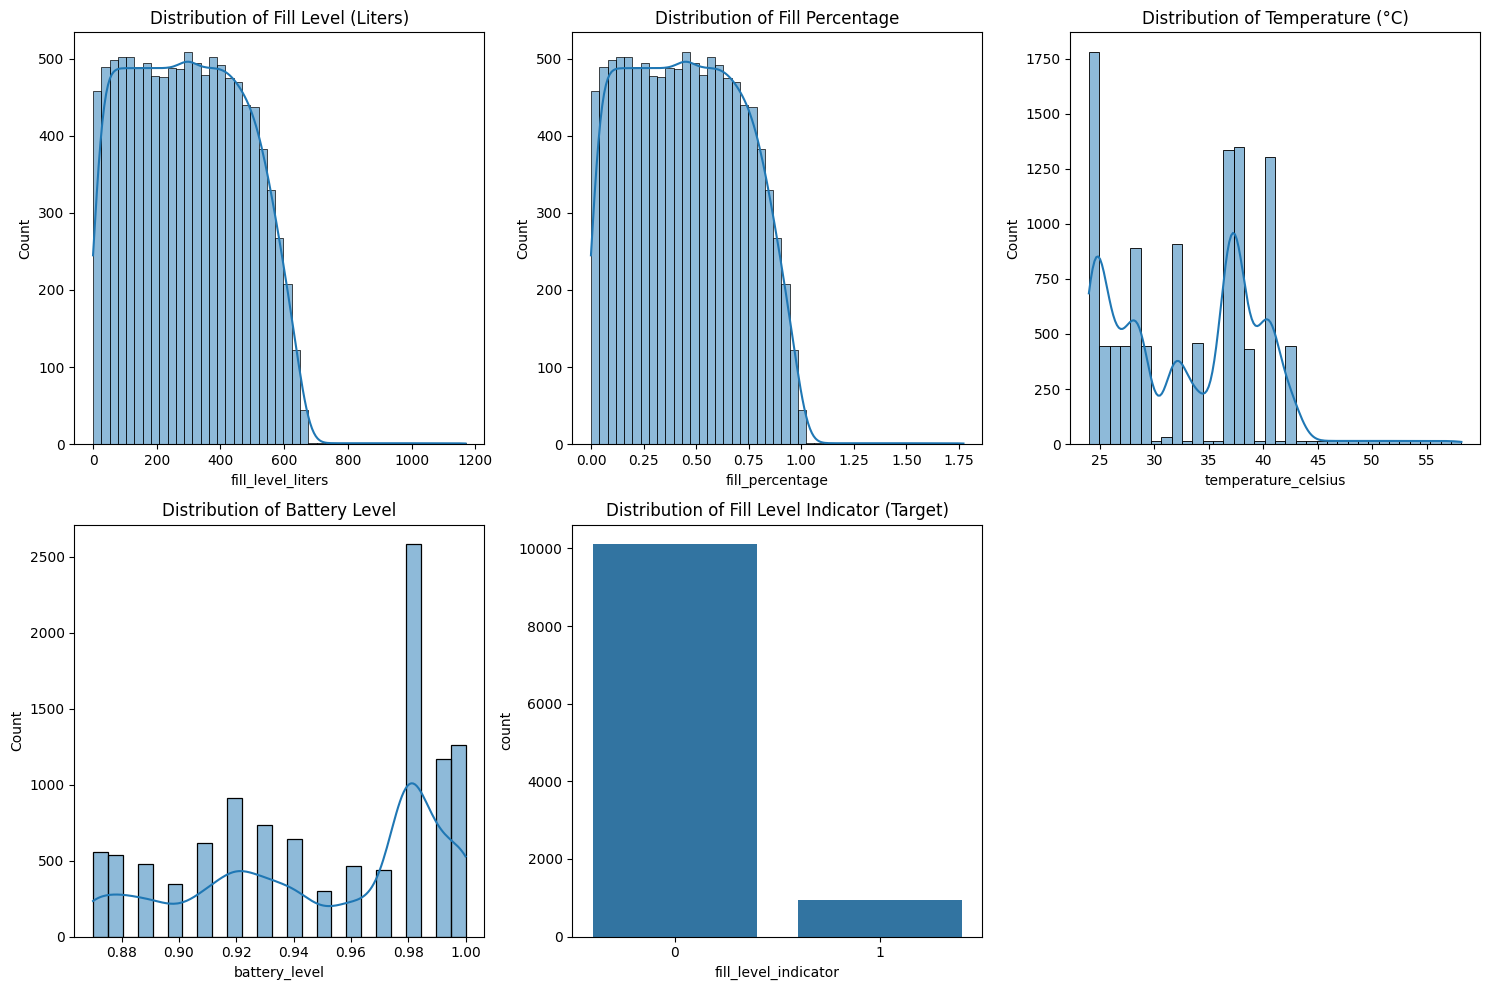


 Checking for NaN values in X before splitting 
bin_id                           0
week_no                          0
totallitres                      0
fill_percentage                  0
location                         0
latitude                         0
longitude                        0
temperature_in_⁰c                0
battery_level                    0
fill_level_indicatorabove_550    0
fill_level_liters                0
temperature_celsius              0
dtype: int64

 Checking for NaN values in y before splitting 
0

 Data preprocessing complete 
Shape of X_train: (8832, 67)
Shape of X_test: (2209, 67)
Shape of y_train: (8832,)
Shape of y_test: (2209,)

 Training Models 
Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training Support Vector Machine...
Support Vector Machine trained.

 Evaluating models 
Evalu

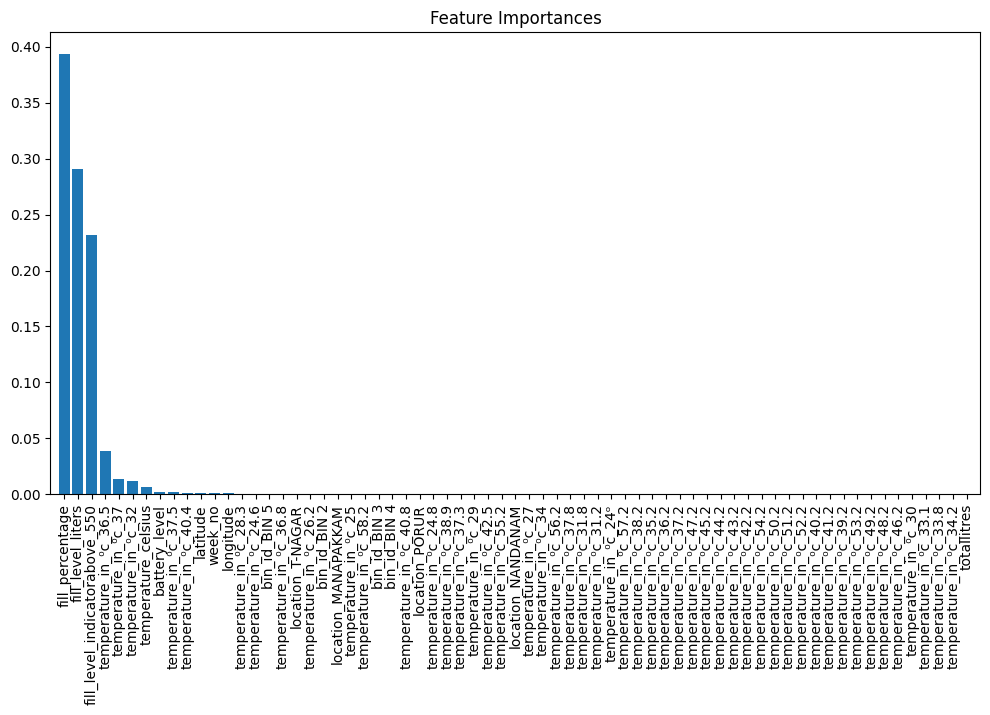

In [61]:
# Upload dataset files
from google.colab import files
uploaded = files.upload()

# Load the excel files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df1 = pd.read_excel('trash data- PS 2.xlsx')
df2 = pd.read_excel('trash data PS-2.xlsx')

print("First dataset:")
print(df1.head())

print("\nSecond dataset:")
print(df2.head())

# Check column names
print("Column names in the first dataset:")
print(df1.columns)
print("Column names in the second dataset:")
print(df2.columns)





# Data Cleaning and Preprocessing

# Clean up the column names for easier access
df1.columns = df1.columns.str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_').str.lower()
df2.columns = df2.columns.str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_').str.lower()

print("\nCleaned column names for the first dataset:")
print(df1.columns)

print("\nCleaned column names for the second dataset:")
print(df2.columns)

# Data type conversions
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y')
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S').dt.time

df1['fill_level_liters'] = pd.to_numeric(df1['fill_levelin_litres'], errors='coerce')
df1['total_liters'] = pd.to_numeric(df1['totallitres'], errors='coerce')

df1['fill_percentage'] = df1['fill_percentage'].astype(str).str.replace('%', '').astype(float)
df1['temperature_celsius'] = df1['temperature_in_⁰c'].astype(str).str.replace('ᵒ', '', regex=False).str.replace('°', '', regex=False).astype(float)
df1['battery_level'] = df1['battery_level'].astype(str).str.replace('%', '').astype(float)

# check the unique values in the fill_level_indicator column
print("\nUnique values in fill_level_indicator from original dataFrame (df1) ")
print(df1['fill_level_indicatorabove_550'].unique())

# Fill NaN values in fill_level_indicatorabove_550 with 0
df1['fill_level_indicatorabove_550'].fillna(0, inplace=True)

# Create a binary indicator (0 or 1) for fill level
df1['fill_level_indicator'] = df1['fill_level_indicatorabove_550'].astype(int)

# Clean latitude and longitude
df1['latitude'] = df1['latitude'].astype(str).str.replace('° N', '', regex=False).str.replace('⁰N', '', regex=False).astype(float)
df1['longitude'] = df1['longitude'].astype(str).str.replace('° E', '', regex=False).str.replace('⁰E', '', regex=False).astype(float)

# Check for remaining NaN values in the DataFrame
print("\n Checking for NaN Values in the Dataset ")
print(df1.isnull().sum())

# Fill NaN values for numeric columns with the mean
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())

# Handle non-numeric columns
categorical_cols = df1.select_dtypes(include=[object]).columns
for col in categorical_cols:
    if not df1[col].empty:
        mode_value = df1[col].mode()
        if not mode_value.empty:
            df1[col].fillna(mode_value[0], inplace=True)

print("\n DataFrame info after type conversion for the first dataset ")
df1.info()
print("\n Descriptive statistics after type conversion for the first dataset ")
print(df1.describe(include='all'))





# Exploratory Data Analysis (EDA)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df1['fill_level_liters'], kde=True)
plt.title('Distribution of Fill Level (Liters)')

plt.subplot(2, 3, 2)
sns.histplot(df1['fill_percentage'], kde=True)
plt.title('Distribution of Fill Percentage')

plt.subplot(2, 3, 3)
sns.histplot(df1['temperature_celsius'], kde=True)
plt.title('Distribution of Temperature (°C)')

plt.subplot(2, 3, 4)
sns.histplot(df1['battery_level'], kde=True)
plt.title('Distribution of Battery Level')

plt.subplot(2, 3, 5)
sns.countplot(x='fill_level_indicator', data=df1)
plt.title('Distribution of Fill Level Indicator (Target)')

plt.tight_layout()
plt.show()





# Data Preprocessing

# Drop unneccary columns
features_to_drop = ['total_liters', 'fill_levelin_litres', 'date', 'time']
df_processed = df1.drop(columns=features_to_drop, errors='ignore')

# Define features as X and target as y
X = df_processed.drop('fill_level_indicator', axis=1)
y = df_processed['fill_level_indicator']

# Check for NaN values in X and y before splitting
print("\n Checking for NaN values in X before splitting ")
print(X.isnull().sum())
print("\n Checking for NaN values in y before splitting ")
print(y.isnull().sum())

if X.isnull().values.any() or y.isnull().values.any():
    print("There are NaN values in X or y. Please handle them before proceeding.")
else:
    # Convert categorical variables to numerical (one-hot encoding)
    X = pd.get_dummies(X, drop_first=True)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print("\n Data preprocessing complete ")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")





# Model Selection and Training

if 'X_train' in locals() and 'y_train' in locals():
    models = {
        "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Support Vector Machine": SVC(random_state=42, probability=True)
    }

    trained_models = {}

    print("\n Training Models ")
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"{name} trained.")




    # Model Evaluation

    print("\n Evaluating models ")
    for name, model in trained_models.items():
        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
else:
    print("X_train and y_train are not defined. check the data preprocessing steps.")





# Hyperparameter Tuning and Cross-Validation for Random Forest

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the best model
best_rf_model = grid_search.best_estimator_





# Final Model Evaluation
y_pred_best_rf = best_rf_model.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Accuracy: {accuracy_best_rf:.4f}, Precision: {precision_best_rf:.4f}, Recall: {recall_best_rf:.4f}, F1 Score: {f1_best_rf:.4f}")
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


# Feature Importance Analysis
importances = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

print("\nFeature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances of the best model
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
